<a href="https://colab.research.google.com/github/nameonwoo/math/blob/main/%EA%B2%B0%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv( '/content/fake_bills.csv', sep=';')

In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
df['is_genuine'] = df['is_genuine'].astype(int)

In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
import missingno as msno

<Axes: >

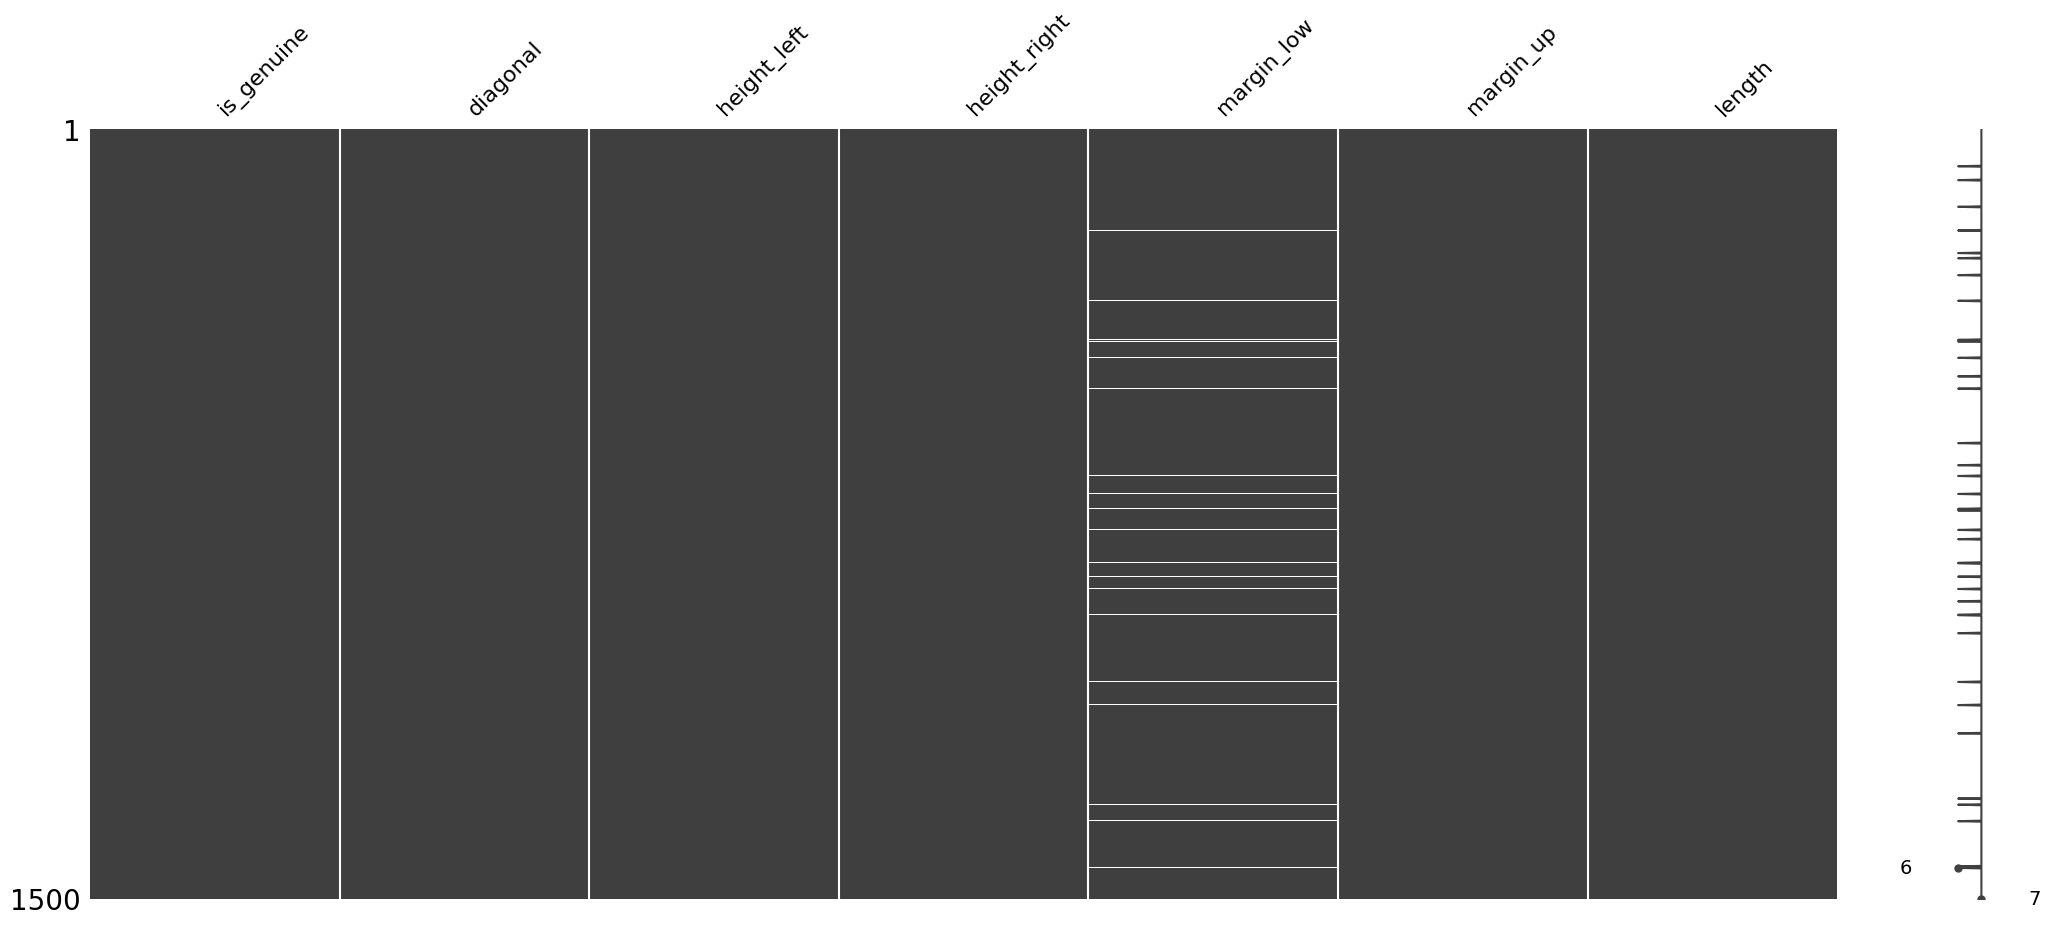

In [ ]:
msno.matrix(df)

<Axes: >

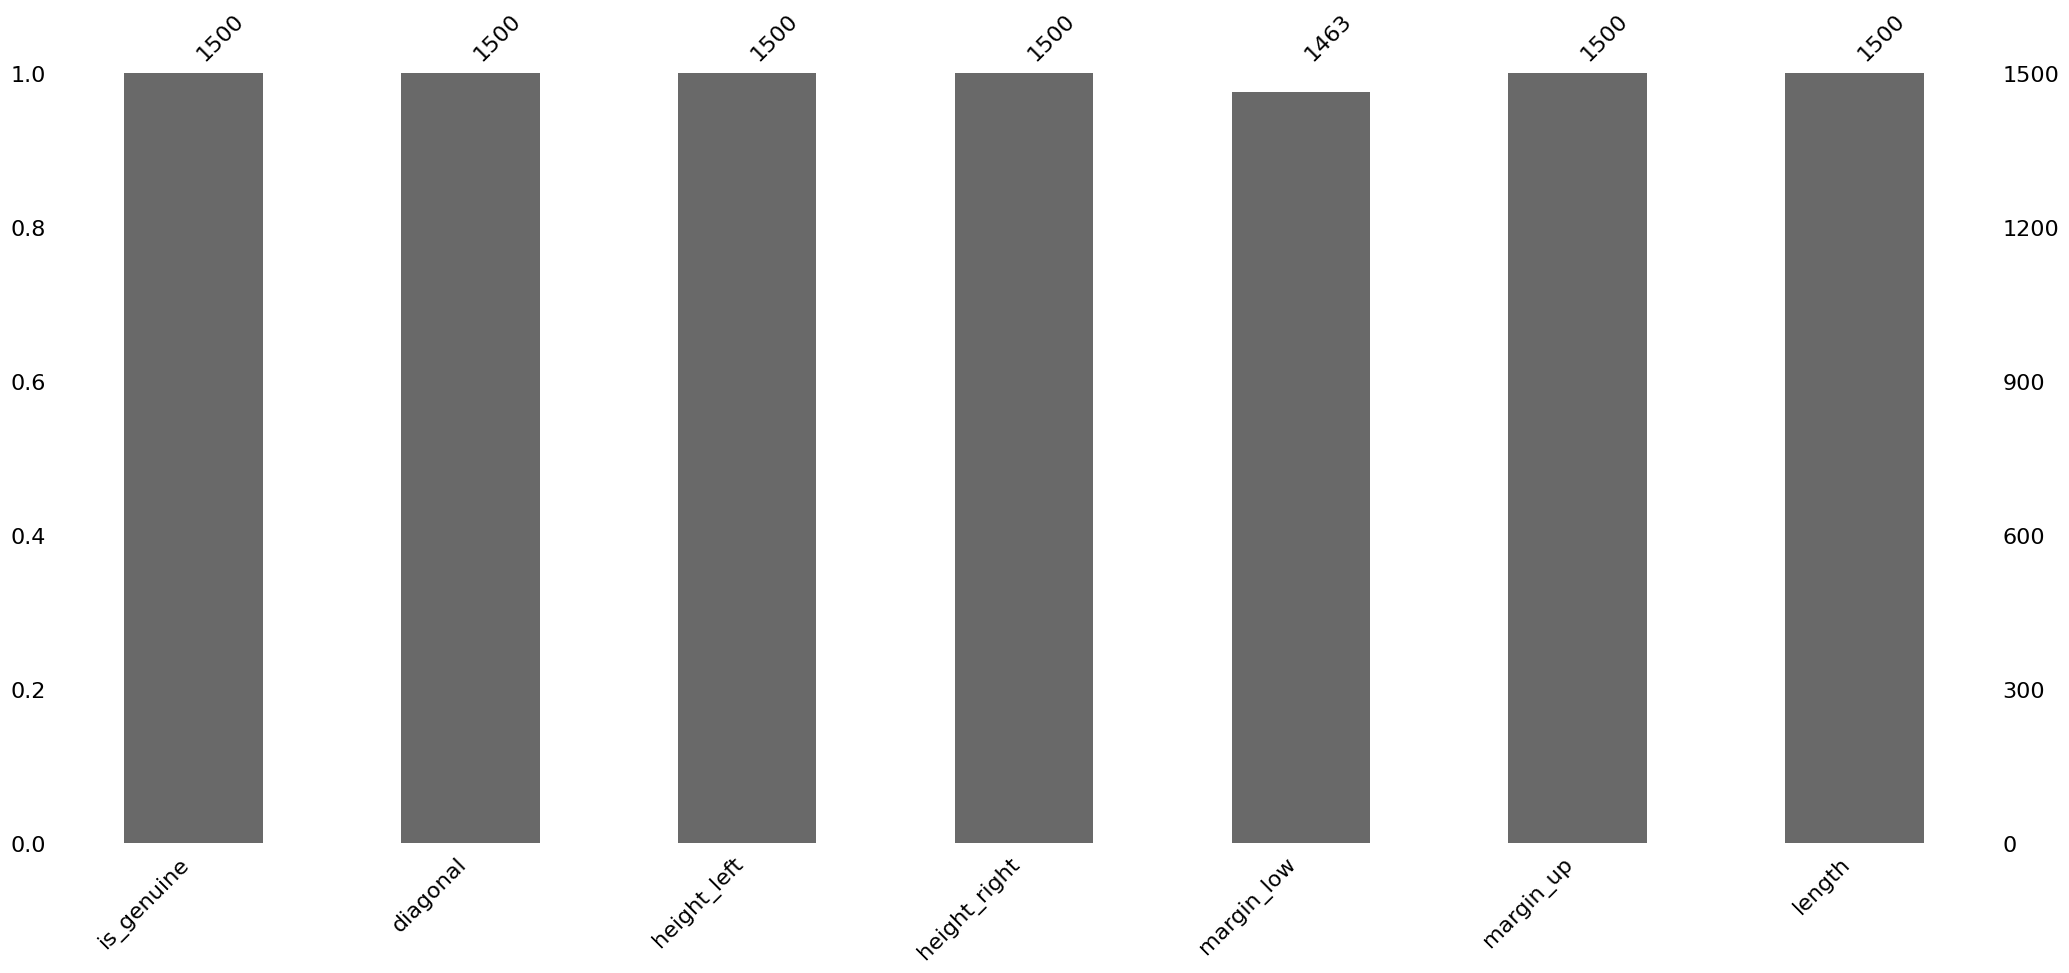

In [ ]:
msno.bar(df)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [ ]:
df_imputed

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


<Axes: >

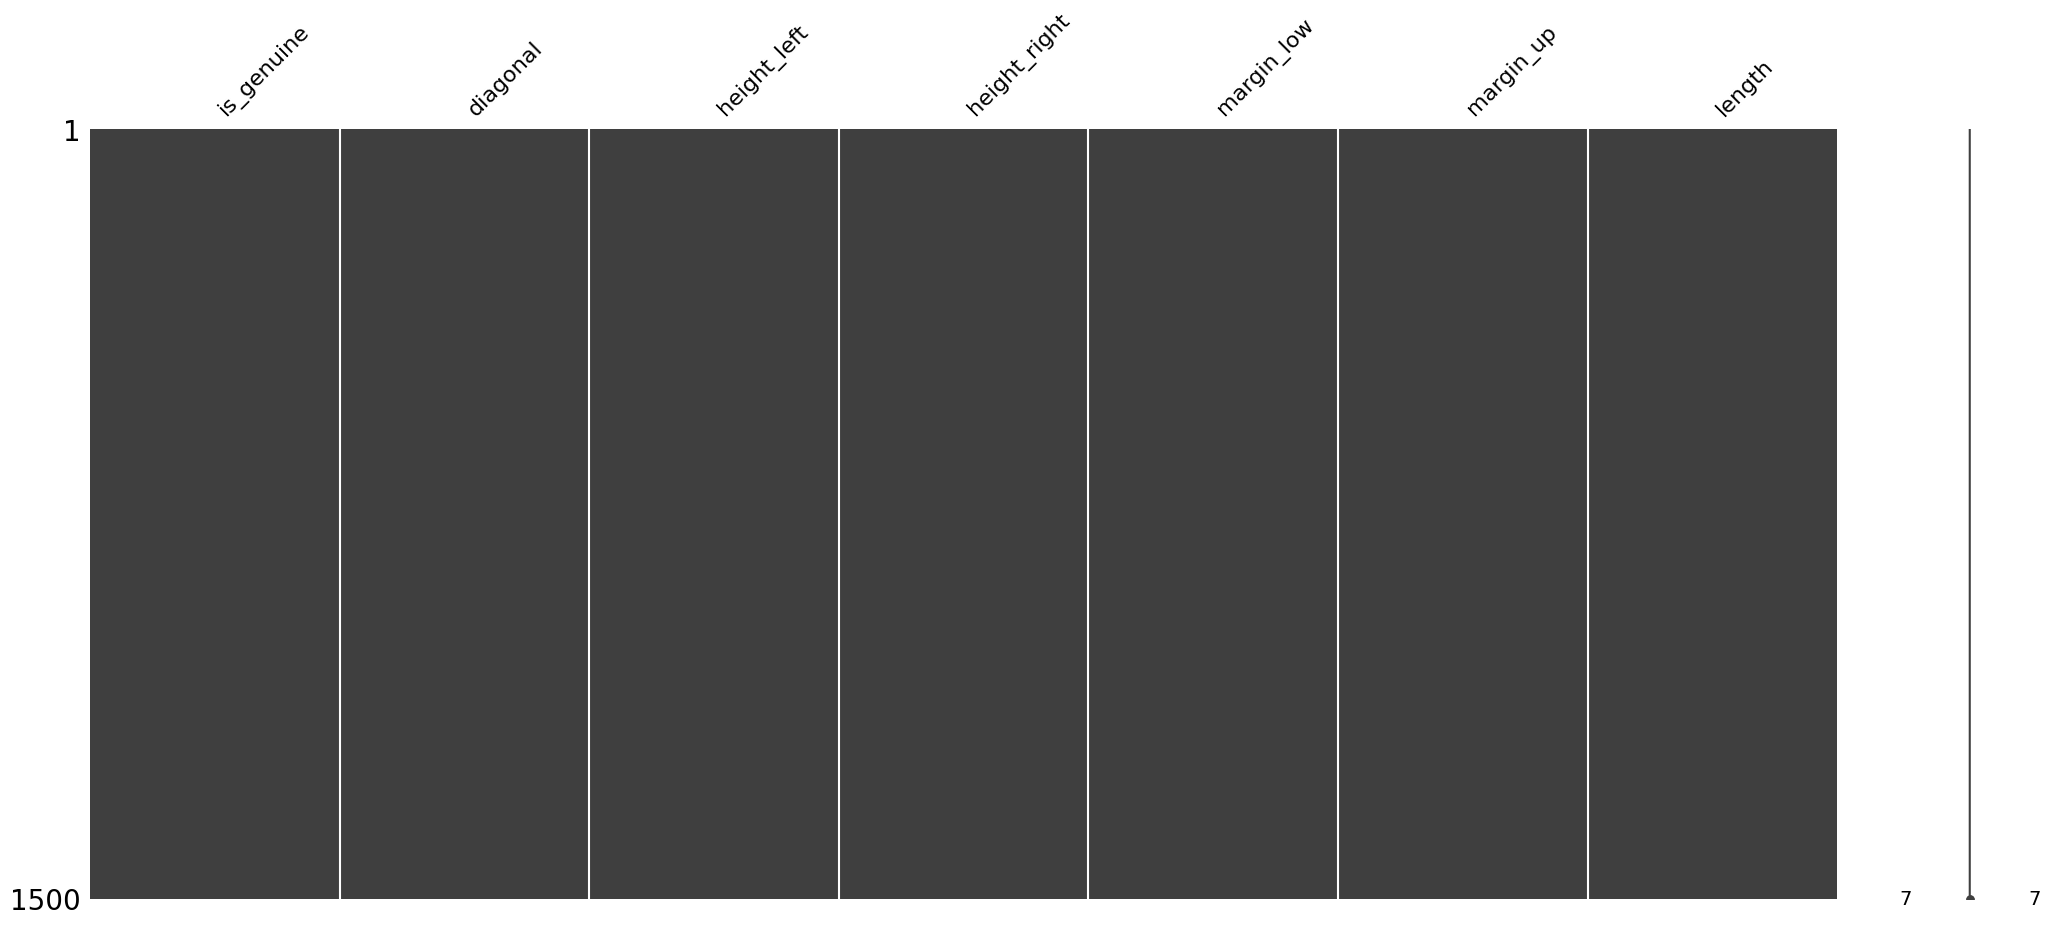

In [ ]:
msno.matrix(df_imputed)

<Axes: >

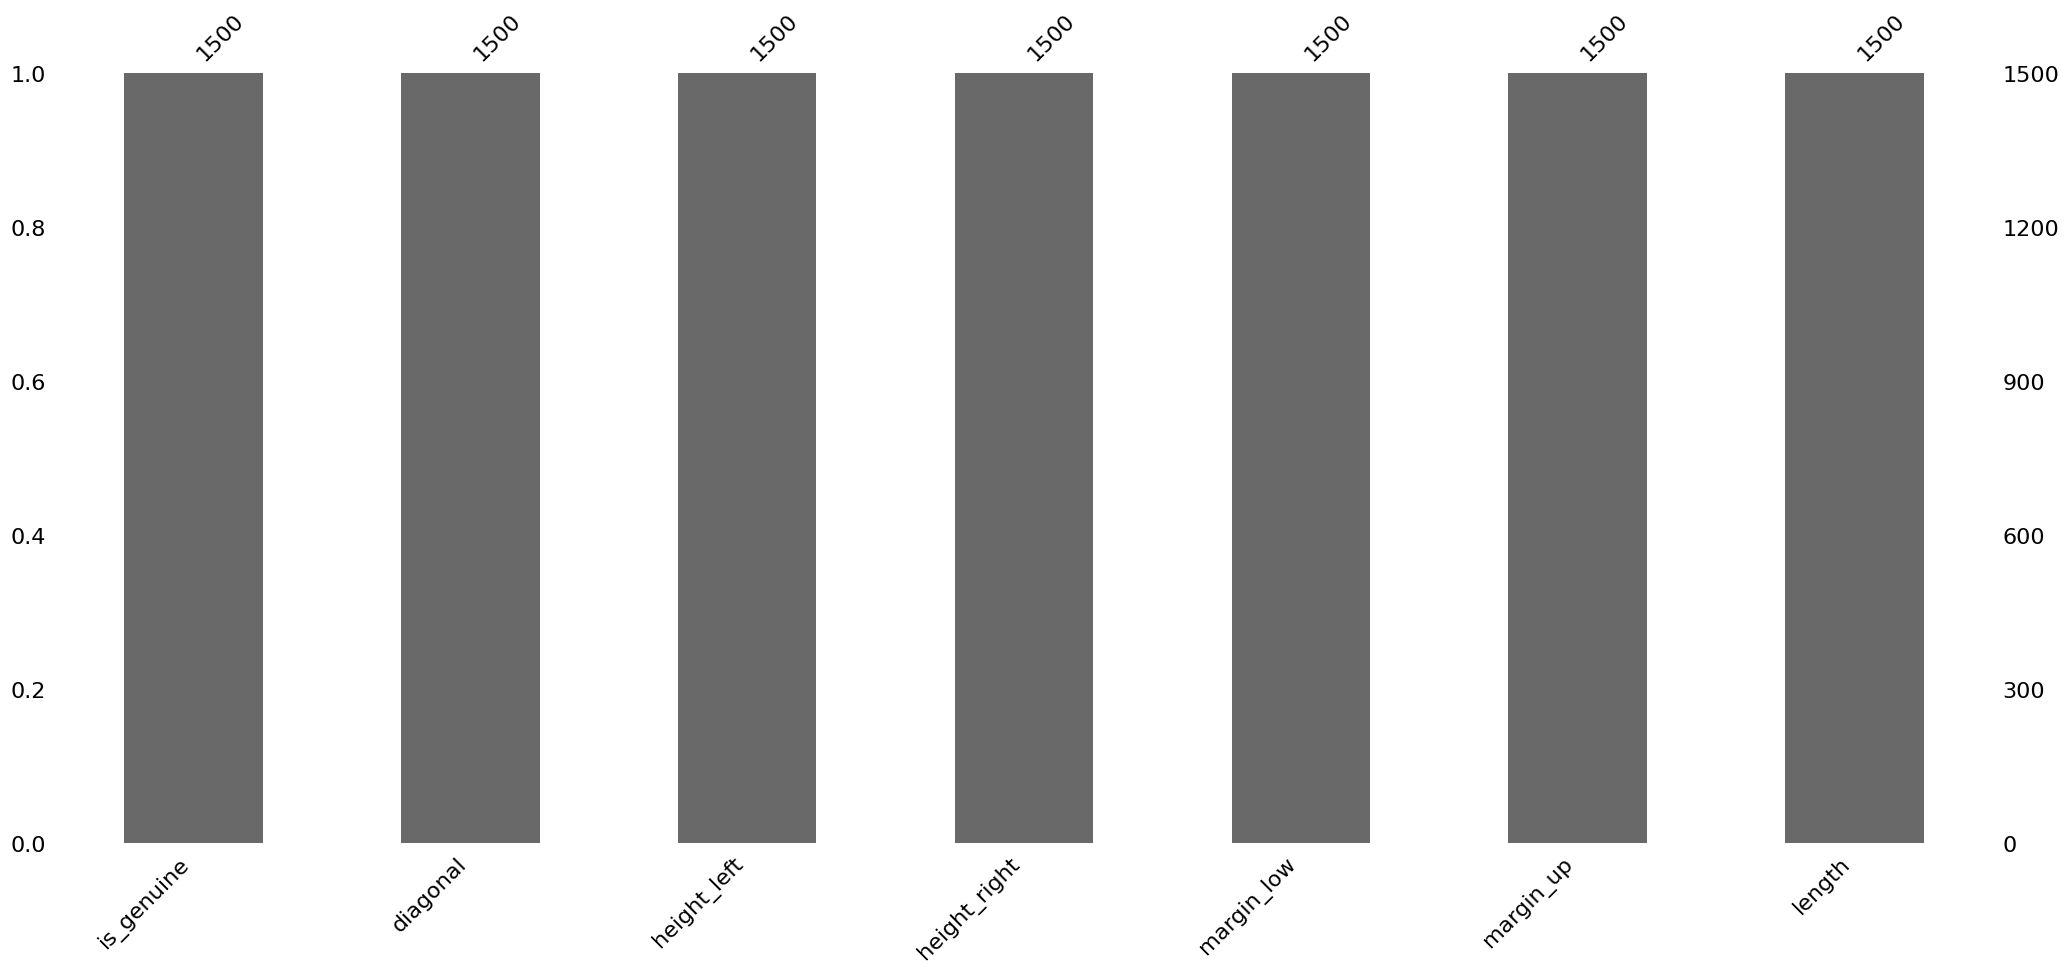

In [ ]:
msno.bar(df_imputed)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

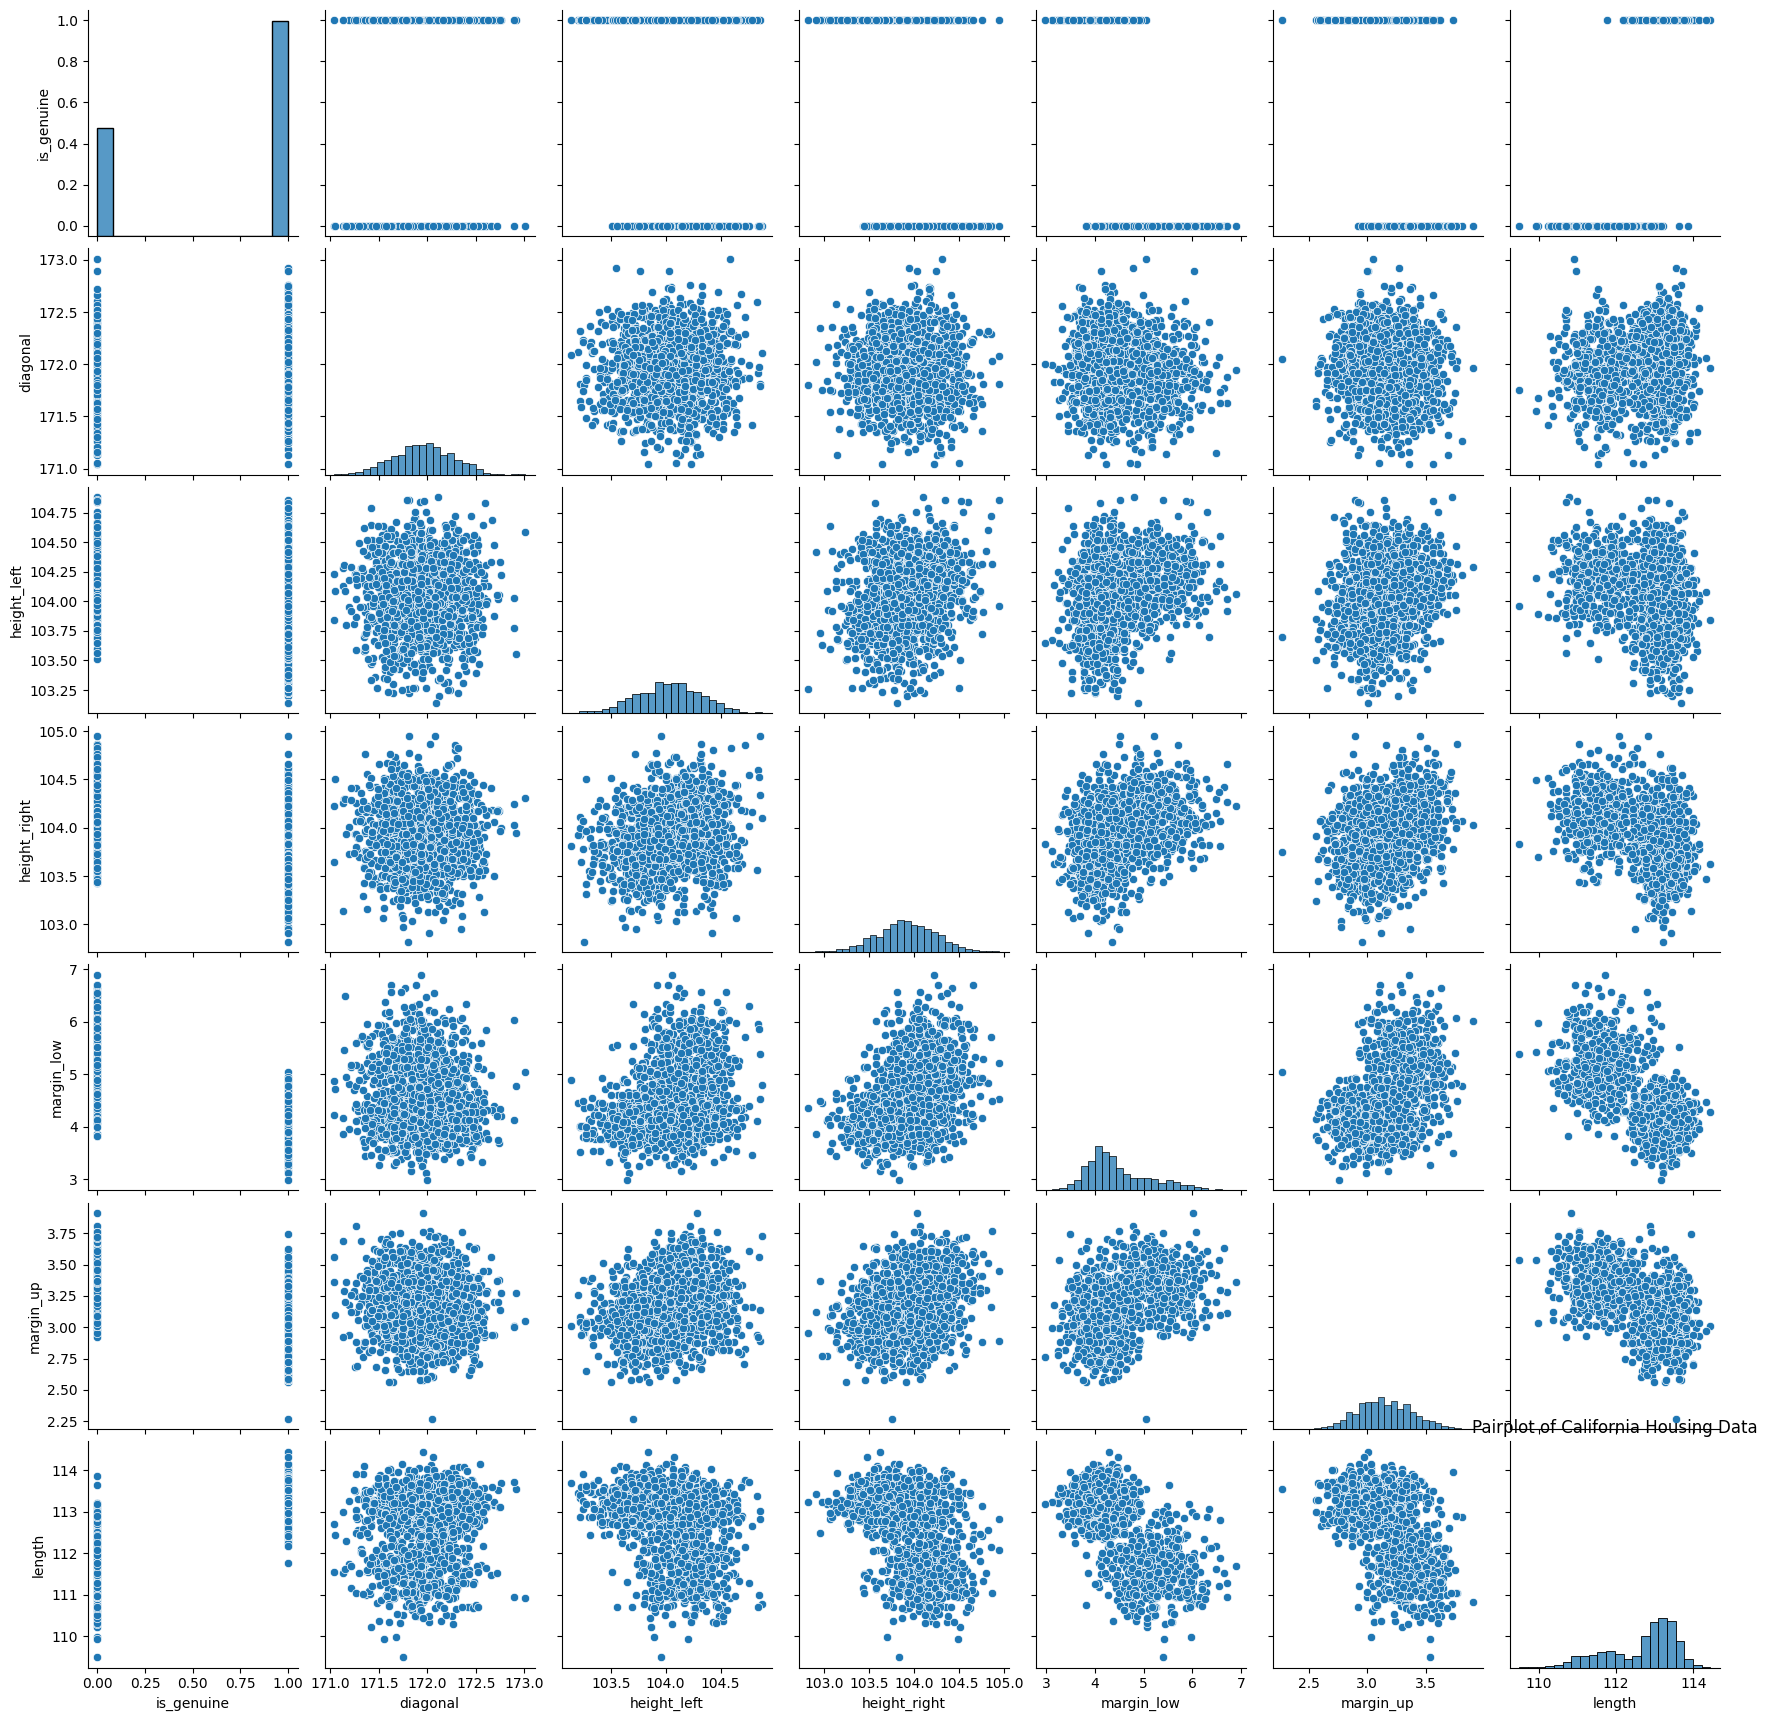

In [ ]:
sns.pairplot(df_imputed)
plt.title('Pairplot of California Housing Data')
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(df_imputed.values.T)

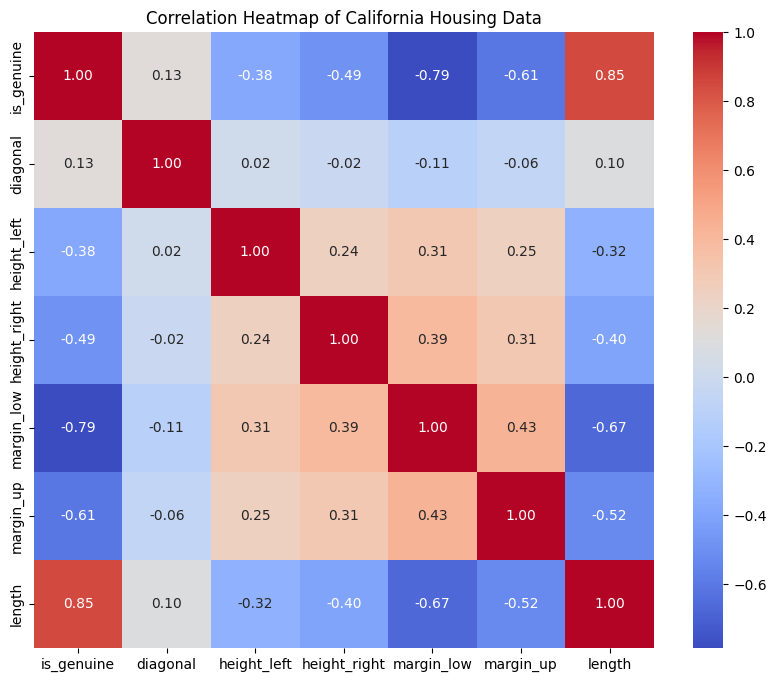

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df_imputed.columns, yticklabels=df_imputed.columns)
plt.title('Correlation Heatmap of California Housing Data')
plt.show()

In [ ]:
# 타겟 변수 지정
target = df_imputed['is_genuine']  # target_c
df_imputed = df_imputed.drop(['is_genuine'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

df_standardized = pd.DataFrame(df_standardized, columns=df_imputed.columns)

# 결과 확인
df_standardized.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.054615,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.082481,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.127320,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.309900,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.673126,1.417677,-0.158750


In [ ]:
from sklearn.model_selection import train_test_split

# 입력 변수와 타겟 변수 분리
X = df_standardized
y = target

# train dataset과 test dataset을 80:20 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# kNN 모델 생성
knn = KNeighborsClassifier()

# 탐색할 하이퍼파라미터 범위 지정
param_grid = {'n_neighbors': range(1, 21),  # 이웃의 수
              'weights': ['uniform', 'distance'],  # 가중치
              'p': [1, 2]}  # 거리 측정 방법 (1: 맨하탄 거리, 2: 유클리디언 거리)

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 하이퍼파라미터를 사용한 모델
best_knn = grid_search.best_estimator_

# 최적의 모델 평가
accuracy = best_knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
Test Accuracy: 0.9866666666666667
